# Explore here

In [1]:
!pip install missingno lazypredict
!pip install statsmodels


  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
  Using cached lazypredict-0.2.12-py2.py3-none-any.whl.metadata (12 kB)
  Using cached click-8.1.7-py3-none-any.whl.metadata (3.0 kB)
  Using cached tqdm-4.66.5-py3-none-any.whl.metadata (57 kB)
  Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl.metadata (17 kB)
Using cached missingno-0.5.2-py3-none-any.whl (8.7 kB)
Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
Using cached click-8.1.7-py3-none-any.whl (97 kB)
Using cached lightgbm-4.5.0-py3-none-manylinux_2_28_x86_64.whl (3.6 MB)
Using cached tqdm-4.66.5-py3-none-any.whl (78 kB)
  Using cached statsmodels-0.14.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.2 kB)
  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
Using cached statsmodels-0.14.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.7 MB)
Using cached patsy-0.5.6-py2.py3-none-any.whl (233 kB)


In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
from sklearn.impute import KNNImputer
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import xgboost as xgb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
#from lazypredict.Supervised import LazyRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.ensemble import BaggingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import joblib
from sklearn.preprocessing import LabelEncoder 


In [3]:
#1) Descargo los datos de Air B&B:

#a) Leo los datos de la URL.
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"

#b) Guardo los datos en un DataFrame.
df = pd.read_csv(url)

#c) Miro las primeras filas del DF.
print(df.head())


     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [4]:
# Guardo el DataFrame.
df.to_csv('/workspace/Proyecto13_albaebauluz/data/raw/AB_NY.csv', index=False)
#Configuro la biblioteca de Pandas en Python para controlar cómo se muestra el DF cuando los visualizo en un entorno interactivo (Jupyter Notebook). Nota: "None" sirve para que pandas muestre el total de las columnas aunque sean muchas. 
pd.set_option('display.max_columns', None)

df.head()
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [5]:
# Tamaño de la muestra.
df.shape   # La BD tiene 48895 filas y 16 columnas.

# Información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
# Cuento el número de valores únicos en cada columna del DF.
""" 
Conclusión: No hay id repetidos.
"""
df.nunique()



id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [7]:
# Limpio las columnas del DF.

# Quito las columnas que no tienen valor predictivo (id, name, host_id, host_name, calculated_host_listings_count):
df.drop(columns=['id','name','host_id','host_name','calculated_host_listings_count'], inplace=True)

# Quito las variables last_review y reviews_per_month porque tienen valores NAN, no aportan valor predictivo y puede que causen multicolinealidad.
df.drop(columns=['last_review','reviews_per_month'], inplace=True)

# Nota: No hay columnas con valores constantes.

In [8]:
# Compruebo si se han eliminado las varibles del DF.
df.info()
df.shape    # La muestra actual se compone de 48895 filas y 9 columnas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  48895 non-null  object 
 1   neighbourhood        48895 non-null  object 
 2   latitude             48895 non-null  float64
 3   longitude            48895 non-null  float64
 4   room_type            48895 non-null  object 
 5   price                48895 non-null  int64  
 6   minimum_nights       48895 non-null  int64  
 7   number_of_reviews    48895 non-null  int64  
 8   availability_365     48895 non-null  int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


(48895, 9)

In [9]:
# Compruebo se hay valores duplicados. Nota: No hay duplicados.
df.duplicated().sum()

np.int64(0)

In [10]:
# Miro los valores que toma la variable "number_of_reviews" para considerar si creo una variable dummy que indique si el anuncio es nuevo o no.
print(df['number_of_reviews'].value_counts())

# Conclusión: El máximo de visitas es igual a 341 visitas. Existen 10052 anuncios de viviendas que no tienen visitas, suponemos que son anuncios nuevos.

number_of_reviews
0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
372        1
299        1
436        1
310        1
341        1
Name: count, Length: 394, dtype: int64


In [11]:
# Creo una variable dummy para indicar si el anuncio es nuevo. IMPORTANTE: Posteriormente comprobar cuál de las dos variables tienen mayor capacidad predictiva (number_of_reviews o). Poner las dos causaría un sesgo por multicolinealidad (mirar la correlacióm, pero supongo que es muy alta).
df['anuncio_nuevo'] = (df['number_of_reviews'] > 0).astype(int)

df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365,anuncio_nuevo
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,365,1
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,355,1
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,365,0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,194,1
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0,1


In [12]:
# Análisis descriptivo de la muestra.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000
anuncio_nuevo,48895.0,0.794417,0.404131,0.00000,1.00000,1.00000,1.000000,1.00000


In [14]:
CONCLUSIONES: 
La muestra se compone de 48895 observaciones (anuncios de viviendas para alquilar por Air B&B en Nueva York).
El precio medio es de 152.72 $/noche. Importante: El precio mínimo es de 0$, que seguramente indique que hay un problema con esas observaciones(mirar el % y eliminar). Por otro lado, mientras que en el Q3 el precio es de 175 %, en el Q4 es de 10.000$, que indica la posible existencia de valores atípicos.
La duración mínima de la estancia es de 7.03 noches, llegando a alcanzar las 1250 noches. Este último dato no tiene sentido, puesto que supone un alquiler de casi 3.5 años. Por lo tanto, posiblemente se deba a un error en la BD.
Hay 112.8 viviendas que están disponibles para alquilar todos los días del año.
Los anuncios de las viviendas ofertadas tienen una media de 23.27 reseñas, siendo superior al número de reseñas mediano y muy cercano al Q3.
El 79% de los anuncios son nuevos.


SyntaxError: invalid syntax (779344547.py, line 1)

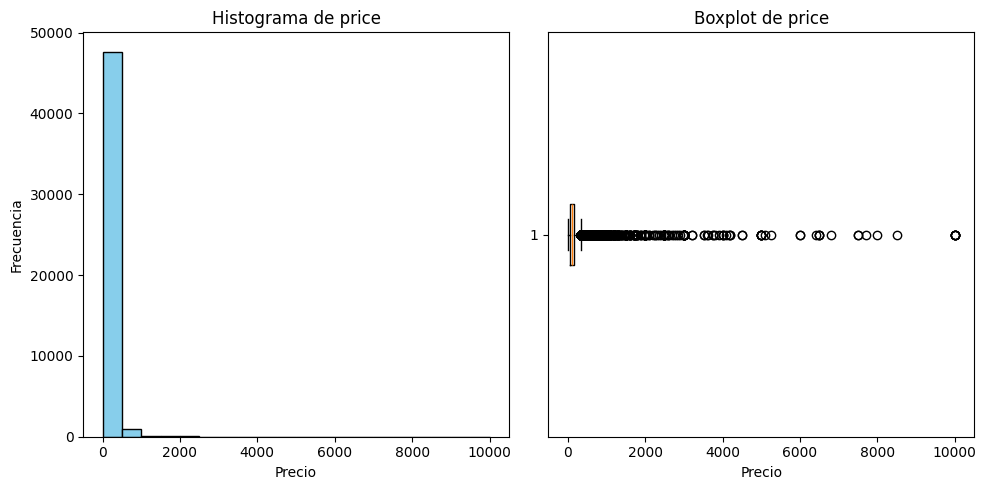

In [14]:
# QUITAR?? HACER OTROS GRÁFICOS PARA LAS VARIABLES??


# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['price'], bins=20, color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de price')
ax[0].set_xlabel('Precio')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(df['price'], vert=False)
ax[1].set_title('Boxplot de price')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [14]:
# Transformo la variable "Precio" en logaritmo.
   #1) Miro si hay anuncios que tengan un precio igual a 0.
precio_0 = (df['price'] == 0).sum()
print(precio_0)
   #2) Si hay anuncios cuyo precio es 0, evaluar si quito esas observaciones o las imputo un valor de 0.1. Para ello compruebo la representatividad de estas observaciones sobre la muestra.
precio_0_porcen = (precio_0/len(df))*100
print(precio_0_porcen)
   # NOTA: La muestra tiene 11 observaciones (0.02%) cuyo precio es igual a 0.
   #3) Elimino las 11 observaciones que tienen un precio de 0$.
df = df[df['price'] > 0]

#print(df[['price', 'ln_price']].head())

# Transformo la variable "Precio" en logaritmo.
df['ln_price'] = np.log(df['price'])

0
0.0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48884.0,40.728953,0.054532,40.499790,40.690100,40.723080,40.763120,40.91306
longitude,48884.0,-73.952176,0.046159,-74.244420,-73.983080,-73.955685,-73.936290,-73.71299
price,48884.0,152.755053,240.170260,10.000000,69.000000,106.000000,175.000000,10000.00000
minimum_nights,48884.0,7.029887,20.512224,1.000000,1.000000,3.000000,5.000000,1250.00000
number_of_reviews,48884.0,23.271991,44.551331,0.000000,1.000000,5.000000,24.000000,629.00000
availability_365,48884.0,112.779498,131.627271,0.000000,0.000000,45.000000,227.000000,365.00000
anuncio_nuevo,48884.0,0.794391,0.404150,0.000000,1.000000,1.000000,1.000000,1.00000
ln_price,48884.0,4.727031,0.698225,2.302585,4.234107,4.663439,5.164786,9.21034


In [16]:
# Evaluo la incidencia de los valores perdidos en cada una de las variables.
df.isnull().mean()*100

# Ninguna variable tiene NAN.

neighbourhood_group    0.0
neighbourhood          0.0
latitude               0.0
longitude              0.0
room_type              0.0
price                  0.0
minimum_nights         0.0
number_of_reviews      0.0
availability_365       0.0
anuncio_nuevo          0.0
ln_price               0.0
dtype: float64

<Axes: >

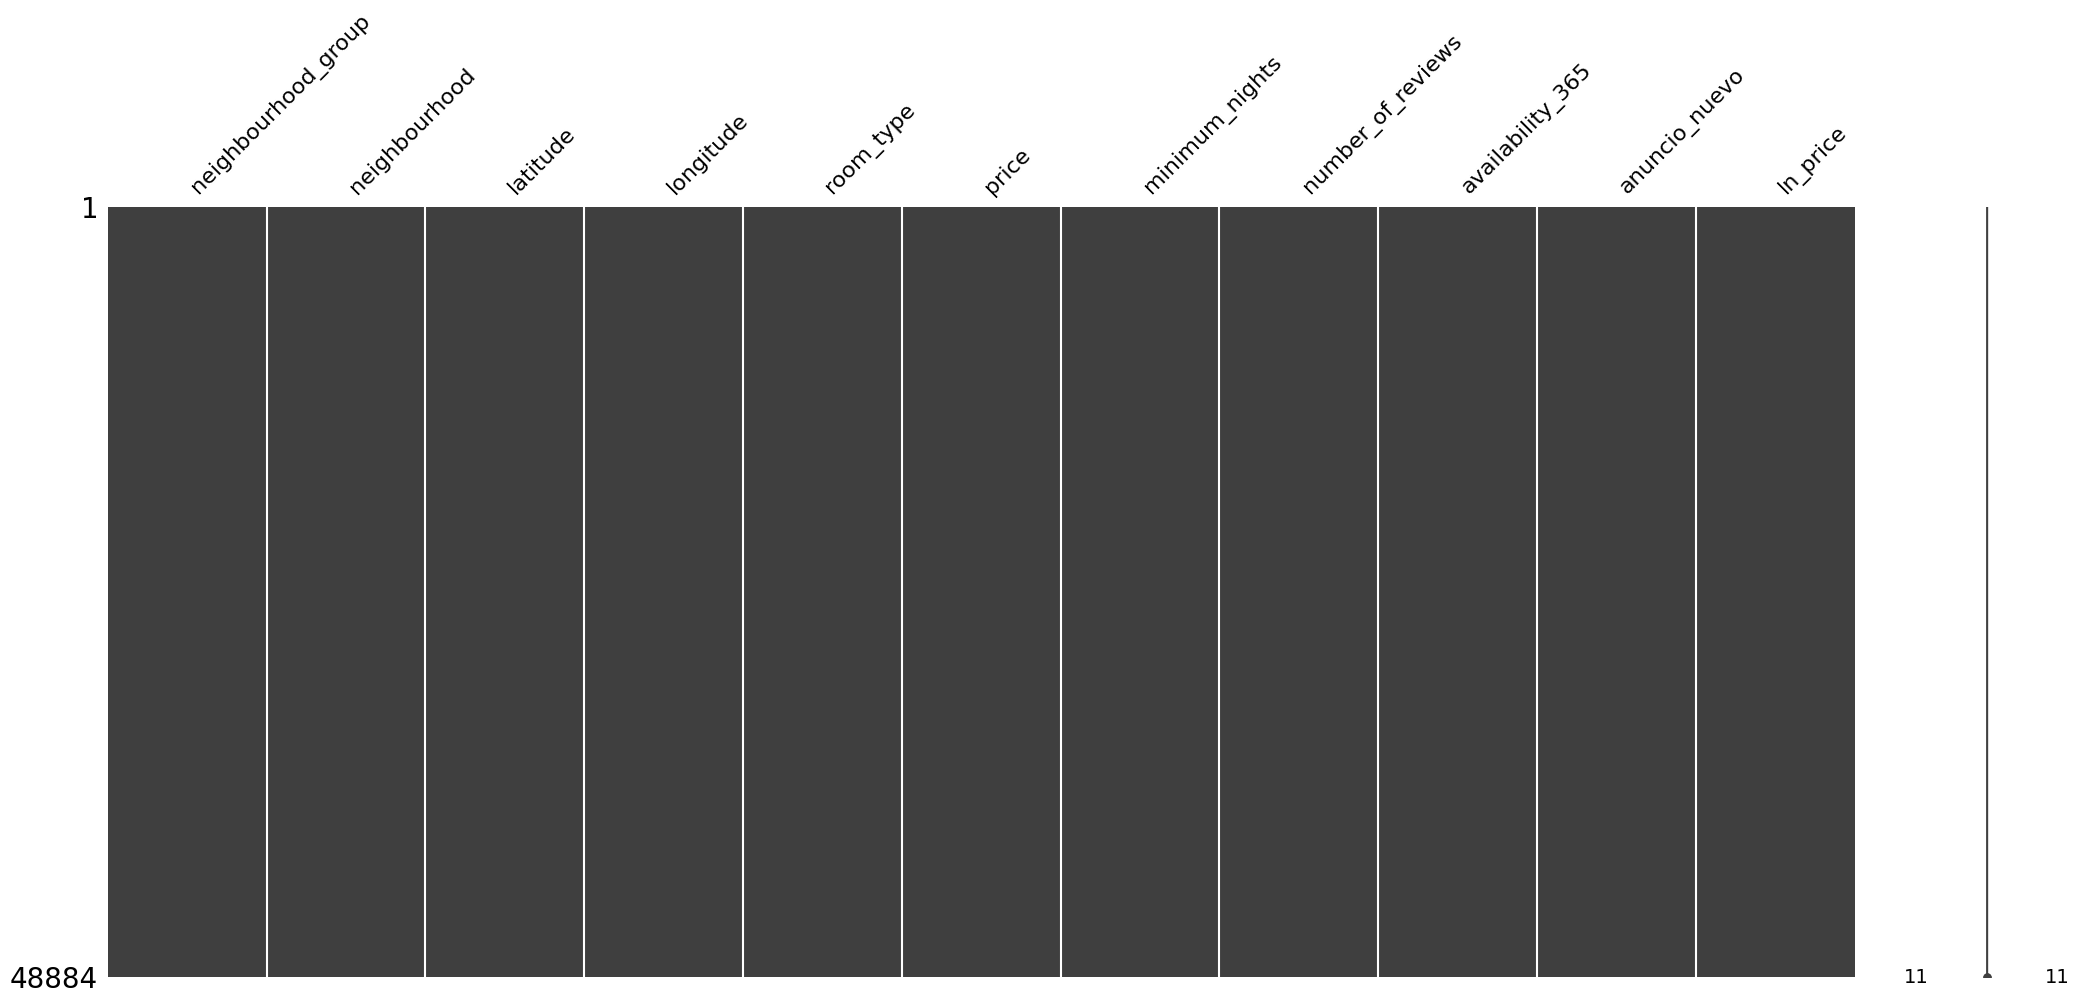

In [18]:
msno.matrix(df)

In [ ]:
# Verifico el tipo de datos de las variables para realizar posteriormente el modelo.
print(x.dtypes)
print(y.dtypes)

# Conclusión: Las variables neighbourhood_group, neighbourhood y room_type son objetos, por lo que tengo que codificarlas,
# neighbourhood_group: Manhattan; Brooklyn; Queens; Bronx; Staten Island
# neighbourhood: Williamsburg; ...; Willowbrook
# room_type: Entire home/apt; Private room; Shared room



In [73]:
# Codifico las variables neighbourhood_group, neighbourhood y room_type. 

#1) Creo una instancia de LabelEncoder.
label_encoder = LabelEncoder()

#2) Codifico la columna neighbourhood_group, neighbourhood y room_type.
df['neigh_group_num'] = label_encoder.fit_transform(df['neighbourhood_group'])
df['neigh_num'] = label_encoder.fit_transform(df['neighbourhood'])
df['room_type_num'] = label_encoder.fit_transform(df['room_type'])

# Verifico las primeras filas para ver el resultado de la codificación.
print(df[['neighbourhood_group', 'neigh_group_num', 'neighbourhood', 'neigh_num', 'room_type', 'room_type_num']].head())

  neighbourhood_group  neigh_group_num neighbourhood  neigh_num  \
0            Brooklyn                1    Kensington        107   
1           Manhattan                2       Midtown        126   
2           Manhattan                2        Harlem         94   
3            Brooklyn                1  Clinton Hill         41   
4           Manhattan                2   East Harlem         61   

         room_type  room_type_num  
0     Private room              1  
1  Entire home/apt              0  
2     Private room              1  
3  Entire home/apt              0  
4  Entire home/apt              0  


In [28]:
# Variables del modelo (dependiente e independientes).

#1) Defino la variable independiente. Nota: Elimino la variable de interés de los parámetros o regresores del modelo, así como las variables codificadas anteriormente (las que están en formato object).
x = df.drop(['ln_price', 'neighbourhood_group', 'neighbourhood', 'room_type'], axis=1)

print(x.dtypes)     #Nota: Todas las variables están en el formato adecuado.

#2) Defino la variable dependiente.
y = df.ln_price

latitude             float64
longitude            float64
price                  int64
minimum_nights         int64
number_of_reviews      int64
availability_365       int64
anuncio_nuevo          int64
neigh_group_num        int64
neigh_num              int64
room_type_num          int64
dtype: object


In [29]:
# Modelo. 
# Nota: "sm" es una abreviatura de statsmodels.api (módulo de la biblioteca statsmodels en Python). "add_constants(X)"" es una función proporcionada por statsmodels que añade una constante B0 (normalmente una columna de unos).
x = sm.add_constant(x)
# Nota: "fit()" ajusta el modelo a los datos realizando un cálculo de los coeficientes de la regresión que minimiza la suma de los cuadrados de las diferencias entre los valores observados y los predichos.
model = sm.OLS(y, x).fit()

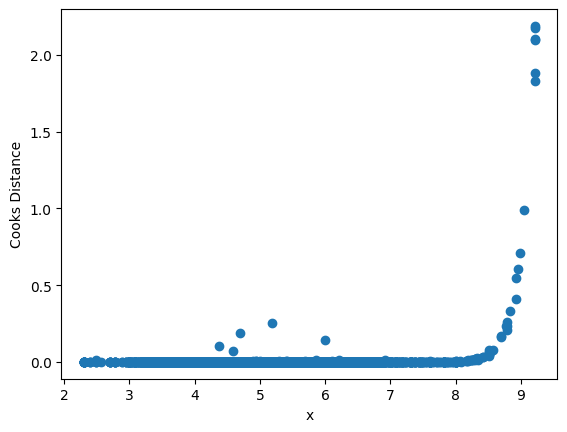

In [31]:
# Distancia de Cook para cada observación. Nota: Permite determinar si una observación es influyente. Se calcula a partir de la suma de los efectos en el modelo al eliminar cada observación
cooks_distance = model.get_influence().cooks_distance

# Gráfico de la Distancia de Cook.
plt.scatter(df.ln_price, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()


In [66]:
#1) Muestro las observaciones más influyentes basándome en la distancia de Cook.
np.where(cooks_distance[0]>1)
np.where(cooks_distance[0]>0.5)
np.where(cooks_distance[0]>0.3)
np.where(cooks_distance[0]>0.2)
np.where(cooks_distance[0]>0.1)

#df.iloc[40422,]

# Conclusión:   Hay 6 observaciones: distancia de Cook > 1 (Se debe a precio elevado).
              # Hay 4 observaciones: 0.5 < distancia de Cook < 1 (Se debe a precio elevado).
              # Hay 2 observaciones: 0.3 < distancia de Cook < 0.5 (Se debe a precio elevado).
              # Hay 6 observaciones: 0.2 < distancia de Cook < 0.3 (Se debe a precio  y número de noches mínimas elevados).
              # Hay 5 observaciones: 0.1 < distancia de Cook < 0.2 (Se debe a precio  y número de noches mínimas elevados).
              # Total: Hay 23 observaciones con una distancia de Cook > 0.1 (Se debe a precio  y número de noches mínimas elevados [precio > 6800$ y noches mínimas > 999]).
              # Por un lado, el precio medio es de 152.7, el Q3 es 175, y Q4 de 10000 por lo que hay datos atípicos en Q4.
              # Por otro lado, el número medio de noches mínimas es de 7.029, el Q3 es 5, y Q4 de 1250 por lo que hay datos atípicos en Q4.
              # Por lo tanto, quito estas 23 observaciones, que representan el 0.05% de la muestra (23 de 48895 observaciones).

neighbourhood_group          Manhattan
neighbourhood          Lower East Side
latitude                       40.7198
longitude                    -73.98566
room_type              Entire home/apt
price                             9999
minimum_nights                      30
number_of_reviews                    0
availability_365                   365
anuncio_nuevo                        0
ln_price                       9.21024
neigh_group_num                      2
neigh_num                          119
room_type_num                        0
Name: 40433, dtype: object

In [68]:
#2) Evaluo si la distancia de Cook es mayor de 4/n (se considera observación influyente).
pto_corte = 4/len(x)
pto_corte

# El 8.18% de las observaciones son influyentes. Dado que este valor es superior al analizar a partir del gráfico, escojo este método para dejar la muestra limpia de datos atípicos que puedan causar sesgos en las predicciones.

8.182636445462728e-05

In [69]:
# Elimino las observaciones siguiendo la regla del punto de corte
df.drop(np.where(cooks_distance[0]>pto_corte)[0], inplace=True)
df.shape

# IMPORTANTE: La muestra final se compone de 46814 filas y 14 columnas. Por lo que he eliminado 2081 observaciones.

(46814, 14)

In [74]:
# Variables del modelo (dependiente e independientes).

#1) Defino la variable independiente. Nota: Elimino la variable de interés de los parámetros o regresores del modelo, así como las variables codificadas anteriormente (las que están en formato object).
x = df.drop(['ln_price', 'price', 'neighbourhood_group', 'neighbourhood', 'room_type'], axis=1)

print(x.dtypes)     #Nota: Todas las variables están en el formato adecuado.

#2) Defino la variable dependiente.
y = df.ln_price

latitude             float64
longitude            float64
minimum_nights         int64
number_of_reviews      int64
availability_365       int64
anuncio_nuevo          int64
neigh_group_num        int64
neigh_num              int64
room_type_num          int64
dtype: object


In [75]:
# Train y Test:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [76]:
# Uso xgb para conocer la importancia de las características. Nota: Uso la biblioteca XGB. XGB es un algoritmo que indica qué variables son más importantes para predecir la variable dependiente. Normalmente se suelen eliminar las que son menores a 1.
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(x_train, y_train)
df_imp = pd.DataFrame({'Feature':x_train.columns, 'Importance':xgb_model.feature_importances_*100})
df_imp = df_imp.sort_values(by='Importance', ascending=False)
df_imp

# La variable más importante para predecir el precio de los alquileres de Air B&B es el tipo de habitación (room_type_num). Sin embargo, tanto neigh_group_num como anuncio_nuevo no son relevantes para predecir el valor de Y (las elimino).

,Feature,Importance
8,room_type_num,87.084129
1,longitude,3.605484
0,latitude,2.324095
4,availability_365,1.815851
2,minimum_nights,1.813189
3,number_of_reviews,1.442444
7,neigh_num,1.190255
6,neigh_group_num,0.724551
5,anuncio_nuevo,0.000000


In [77]:
# Elimino las variables que tienen poca relevancia para predecir el precio de los alquileres (neigh_group_num y anuncio_nuevo).
df_imp[df_imp.Importance>=1].Feature.values

array(['room_type_num', 'longitude', 'latitude', 'availability_365',
       'minimum_nights', 'number_of_reviews', 'neigh_num'], dtype=object)

In [79]:
# Train y Test.
x_train = x_train[df_imp[df_imp.Importance>=1].Feature.values]
x_test = x_test[df_imp[df_imp.Importance>=1].Feature.values]

In [80]:
# Analizo el VIF.
vif = pd.Series([variance_inflation_factor(x_train.corr().values, i) for i in range(x_train.corr().shape[1])], index=x_train.columns)
vif

# No hay variables con un VIF mayor que 10, que indica ausencia de multicolinealidad.

room_type_num        1.198623
longitude            1.311783
latitude             1.316926
availability_365     1.366351
minimum_nights       1.283836
number_of_reviews    1.228989
neigh_num            1.358592
dtype: float64

In [81]:
# Matriz de correlaciones.
x_corr = x_train.copy()
x_corr['y'] = y_train
corr = x_corr.corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)

# Como podemos observar no existe corrlación entre las variables explicativas o parámetros. Asimismo, como cabe esperar, existe correlación entre el tipo de habitación y la variable dependiente Y.

,room_type_num,longitude,latitude,availability_365,minimum_nights,number_of_reviews,neigh_num,y
room_type_num,1.000,0.193,0.007,0.023,-0.081,0.005,-0.072,-0.642
longitude,0.193,1.000,0.076,0.085,-0.076,0.060,-0.102,-0.352
latitude,0.007,0.076,1.000,-0.013,0.026,-0.015,0.239,0.084
availability_365,0.023,0.085,-0.013,1.000,0.175,0.176,-0.036,0.096
minimum_nights,-0.081,-0.076,0.026,0.175,1.000,-0.100,0.036,0.030
number_of_reviews,0.005,0.060,-0.015,0.176,-0.100,1.000,-0.044,-0.040
neigh_num,-0.072,-0.102,0.239,-0.036,0.036,-0.044,1.000,0.150
y,-0.642,-0.352,0.084,0.096,0.030,-0.040,0.150,1.000
